In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
import re
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [143]:
# Reading data using pandas 

data = pd.read_csv(r"C:\Users\Vishnu\Desktop\datas\message_spam.csv")

In [144]:
data

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
3149,ham,CHEERS U TEX MECAUSE U WEREBORED! YEAH OKDEN H...
3150,ham,"Sorry, in meeting I'll call you later"
3151,ham,Yo! Howz u? girls never rang after india. L
3152,ham,Yeah but which is worse for i


In [145]:
# Splitting the data into X and y

X=list(data["message"])
y=data["class"]

C:\Users\Vishnu\anaconda3\envs\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

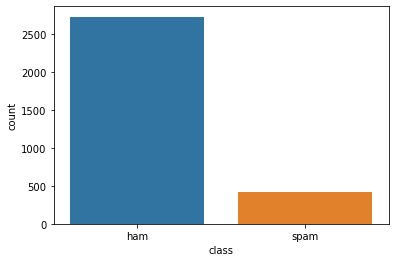

In [146]:
sns.countplot(y)

In [147]:
y.value_counts()

ham     2729
spam     425
Name: class, dtype: int64

In [155]:
# Our data is in text form so some how we have to convert it into numbers  for that i am using nltk library

# first we are going to remove stop words,Special characters from the sentences

def text_preprocessing(X):
    X1=[]
    for i in range(len(X)):
        words = re.sub('[^a-zA-Z0-9]',"",X[i])
        words = re.sub('[\?/,\.:;@#\'\".,!@#$%\^\&\*\(\)]',"",X[i])
        words = words.lower().strip()
        words = nltk.word_tokenize(words)
        words = [WordNetLemmatizer().lemmatize(word) for word in words if word not in stopwords.words('english')]
        words = " ".join(words).strip()
        X1.append(words)
    return X1

In [156]:
# Calling the function
data['clean_text']=text_preprocessing(data.message)

In [157]:
data['message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [158]:
data['clean_text'][10]

'im gon na home soon dont want talk stuff anymore tonight k ive cried enough today'

In [159]:
# Data is ready now lets convert it into vectors
vectorizer = CountVectorizer(max_features=3000)
X_vector = vectorizer.fit_transform(data['clean_text']).toarray()

In [160]:
# X_vector=BOW(text)

In [161]:
X_vector.shape

(3154, 3000)

In [162]:
y.shape

(3154,)

In [163]:
# Our target variable is also in text form let's convet it into vectors

y_vector=np.array(pd.get_dummies(y,drop_first=True)).flatten()

In [164]:
y_vector

array([0, 0, 1, ..., 0, 0, 1], dtype=uint8)

In [175]:
# Let's Split data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test , y_train,y_test = train_test_split(X_vector,y_vector,test_size=0.2)

In [176]:
# Lets built the model 
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train,y_train)

MultinomialNB()

In [177]:
# Let's predict 
predicted=model.predict(X_test)

In [178]:
# Calculating Accuracy
accuracy=sum((predicted==y_test)/len(y_test))
accuracy

0.9809825673533958

In [179]:
# Creating performance metrics

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predicted)

array([[531,   7],
       [  5,  88]], dtype=int64)

In [188]:
# Classification Report

print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       538
           1       0.93      0.95      0.94        93

    accuracy                           0.98       631
   macro avg       0.96      0.97      0.96       631
weighted avg       0.98      0.98      0.98       631



In [186]:
# Cross Validation

cross_val_score(model,X_vector,y_vector,cv=10).mean()

0.9812919429375127

In [198]:
# Testing

new_mail=["free entry for the game. buy soon offer",'hello vishnu how are you, i hope you are doing good']

In [199]:
new_mail = text_preprocessing(new_mail)

In [201]:
new_mail=vectorizer.transform(new_mail).toarray()

In [202]:
new_mail.shape

(2, 3000)

In [203]:
model.predict(new_mail)

array([1, 0], dtype=uint8)